In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [61]:
#read the data
data =pd.read_csv ("Bangalore_1990_2022_BangaloreCity.csv")
data.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0


In [62]:
# Preprocess the data
data['time'] = pd.to_datetime(data['time'], format='%d-%m-%Y')
data = data.set_index('time')


In [63]:
#fillng of NA values
data = data.fillna(data.mean())


In [64]:
data.columns

Index(['tavg', 'tmin', 'tmax', 'prcp'], dtype='object')

In [65]:
#expand the features
features = ['tmin', 'tmax', 'prcp']
target = 'tavg'

In [67]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#model define
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
#Evalution of model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [70]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)

In [71]:
print(f'Training RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}')
print(f'Testing RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}')

Training RMSE: 0.85, MAE: 0.61
Testing RMSE: 0.87, MAE: 0.62


In [72]:
# Predict future values
future_dates = pd.date_range(start=data.index[-1], periods=30, freq='D')
future_data = pd.DataFrame(index=future_dates, columns=features)
future_data = future_data.fillna(data[features].mean())  # Fill with mean values for simplicity

future_predictions = model.predict(future_data)


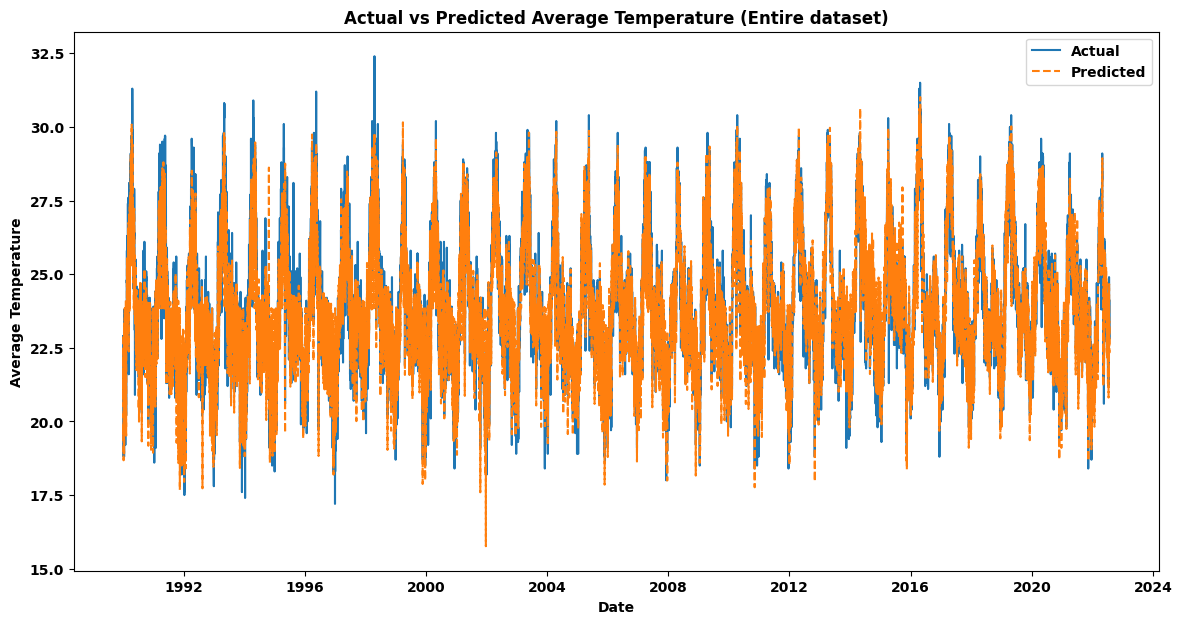

In [73]:
# 5. Time Series Plot of Actual vs Predicted (Entire dataset)
data['Predicted'] = model.predict(X)
plt.figure(figsize=(14, 7))
plt.plot(data.index, data[target], label='Actual')
plt.plot(data.index, data['Predicted'], label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Actual vs Predicted Average Temperature (Entire dataset)')
plt.legend()
plt.show()

In [2]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

def reproject_raster(input_raster, output_raster):
    # Open the input raster file
    with rasterio.open(input_raster) as src:
        # Define the target CRS
        dst_crs = 'EPSG:4326'
        
        # Calculate the transform and dimensions of the output raster
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        
        # Define the metadata for the output raster
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        
        # Open the output raster file
        with rasterio.open(output_raster, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)
    
    print(f"Reprojected raster saved as {output_raster}")

# Example usage
input_raster = "C:/Users/avirat.s/Downloads/2014-11-10_ndbi.tif"
output_raster = "C:/Users/avirat.s/Downloads/2014-11-10_ndbi_EPSG.tif"
reproject_raster(input_raster, output_raster)


Reprojected raster saved as C:/Users/avirat.s/Downloads/2014-11-10_ndbi_EPSG.tif


In [3]:
import os
import rasterio

# Path to the raster file
input_raster = "C:/Users/avirat.s/Downloads/2014-11-10_ndbi.tif"

# Check if the file exists
if os.path.exists(input_raster):
    # Open the raster file and get the CRS
    with rasterio.open(input_raster) as src:
        crs = src.crs
    print("CRS of the raster file:", crs)
else:
    print("The file does not exist at the specified path.")


CRS of the raster file: EPSG:32620


Reprojected raster saved as C:/Users/avirat.s/Downloads/2014-11-10_ndbi_EPSG2.tif


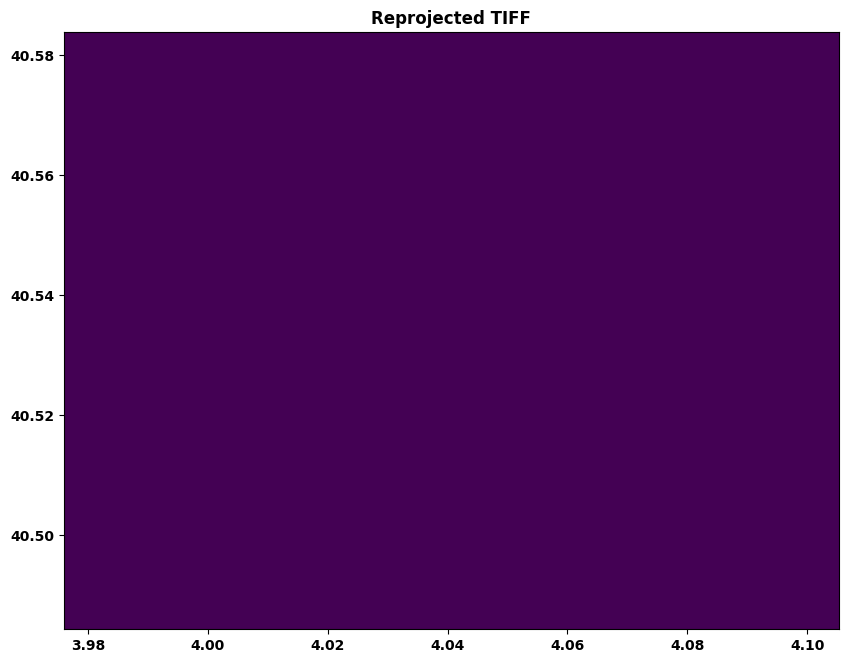

In [5]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import matplotlib.pyplot as plt

def reproject_tiff(input_tiff, output_tiff):
    # Open the input TIFF file
    with rasterio.open(input_tiff) as src:
        # Define the source CRS (assuming it's EPSG:3857)
        src_crs = 'EPSG:3857'
        
        # Define the destination CRS (EPSG:4326)
        dst_crs = 'EPSG:4326'
        
        # Calculate the transform and dimensions for the output TIFF
        transform, width, height = calculate_default_transform(
            src_crs, dst_crs, src.width, src.height, *src.bounds)
        
        # Define the metadata for the output TIFF
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        
        # Reproject the raster and save to the output TIFF file
        with rasterio.open(output_tiff, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src_crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)
    
    print(f"Reprojected raster saved as {output_tiff}")

    # Open and display the reprojected TIFF file
    with rasterio.open(output_tiff) as reprojected_tiff:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        show(reprojected_tiff, ax=ax, title='Reprojected TIFF')
        plt.show()

# Example usage
input_tiff = "C:/Users/avirat.s/Downloads/2014-11-10_ndbi.tif"
output_tiff = "C:/Users/avirat.s/Downloads/2014-11-10_ndbi_EPSG2.tif"
reproject_tiff(input_tiff, output_tiff)


In [7]:
import os
import rasterio
from rasterio.errors import RasterioIOError

# Path to the raster file
input_raster = "C:/Users/avirat.s/Downloads/2014-11-10_ndbi_EPSG2.tif"

# Check if the file exists
if os.path.exists(input_raster):
    try:
        # Open the raster file and get the CRS
        with rasterio.open(input_raster) as src:
            crs = src.crs
        print("CRS of the raster file:", crs)
    except RasterioIOError as e:
        print(f"Error reading the raster file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print("The file does not exist at the specified path.")


CRS of the raster file: EPSG:4326
